In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_excel('/content/drive/MyDrive/KMC-FINAL (1).xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1500 non-null   int64  
 1   Parity(GPLA)             1500 non-null   object 
 2   Family History           1500 non-null   object 
 3   Oral Contraception       1500 non-null   object 
 4   Menarche                 1500 non-null   int64  
 5   Menopause                1500 non-null   object 
 6   Abdominal Pain           1500 non-null   object 
 7   Menstrual Abnormalities  1500 non-null   object 
 8   Dysmenorrhoea            1500 non-null   object 
 9   Abdominal Distention     1500 non-null   object 
 10  Loss of Appetite         1500 non-null   object 
 11  Abnormal Discharge       1500 non-null   object 
 12  Edema                    1500 non-null   object 
 13  Nodes                    1500 non-null   object 
 14  Pallor                  

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Extracting categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Now, all the categorical columns in 'data' have been encoded into numerical values using label encoding


In [ ]:
df.head()

,Age,Parity(GPLA),Family History,Oral Contraception,Menarche,Menopause,Abdominal Pain,Menstrual Abnormalities,Dysmenorrhoea,Abdominal Distention,...,Papillary Projection,Thick Septa,Vascularity,Contrast Enhancement,Lymph Nodes,Deposits,CA125,CA19-9,CEA,CATEGORY
0,37,1,0,1,11,0,0,1,1,0,...,0,0,0,0,0,0,25.94,13.26,1.59,0
1,28,1,0,1,12,0,0,1,1,0,...,0,0,0,0,0,0,13.53,31.68,2.83,0
2,43,1,0,1,14,0,0,1,1,0,...,0,0,0,0,0,0,16.34,17.62,0.43,0
3,21,1,0,1,12,0,0,1,1,0,...,0,0,0,0,0,0,24.82,28.60,2.07,0
4,31,0,0,1,13,0,0,1,1,0,...,0,0,0,0,0,0,5.28,36.76,1.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1500 non-null   int64  
 1   Parity(GPLA)             1500 non-null   int64  
 2   Family History           1500 non-null   int64  
 3   Oral Contraception       1500 non-null   int64  
 4   Menarche                 1500 non-null   int64  
 5   Menopause                1500 non-null   int64  
 6   Abdominal Pain           1500 non-null   int64  
 7   Menstrual Abnormalities  1500 non-null   int64  
 8   Dysmenorrhoea            1500 non-null   int64  
 9   Abdominal Distention     1500 non-null   int64  
 10  Loss of Appetite         1500 non-null   int64  
 11  Abnormal Discharge       1500 non-null   int64  
 12  Edema                    1500 non-null   int64  
 13  Nodes                    1500 non-null   int64  
 14  Pallor                  

In [ ]:
np.unique(df['CATEGORY'])

array([0, 1, 2])

In [ ]:
X = df.drop(['Edema','Nodes','Pallor','P/V Tenderness','Abdominal Mass','Lateral','Ascitis','Solid Area','Papillary Projection','Thick Septa','Vascularity','Contrast Enhancement','Lymph Nodes','Deposits','CATEGORY',],axis =1)
y = df['CATEGORY']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# SINGLE CLASSIFIERS

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state= 0)
logreg.fit(X_train,y_train)
pred_y_logreg = logreg.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
print(confusion_matrix(y_test,pred_y_logreg))
print(accuracy_score(y_test,pred_y_logreg))
print(classification_report(y_test,pred_y_logreg))

[[144   3   0]
 [  0 150   0]
 [  0   0 153]]
0.9933333333333333
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       147
           1       0.98      1.00      0.99       150
           2       1.00      1.00      1.00       153

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# from sklearn.model_selection import cross_val_score, KFold
# kf = KFold(n_splits=2, shuffle=True, random_state=42)
# cv_scores = cross_val_score(logreg, X_train, y_train, cv=kf, scoring='accuracy')
# print("Cross-Validation Scores:", cv_scores)
# print("mean accuracy of logistic regression:", np.mean(cv_scores))

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train)
pred_y_knn= knn.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
print(confusion_matrix(y_test,pred_y_knn))
print(accuracy_score(y_test,pred_y_knn))
print(classification_report(y_test,pred_y_knn))

[[123  24   0]
 [  0 150   0]
 [  1   0 152]]
0.9444444444444444
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       147
           1       0.86      1.00      0.93       150
           2       1.00      0.99      1.00       153

    accuracy                           0.94       450
   macro avg       0.95      0.94      0.94       450
weighted avg       0.95      0.94      0.94       450



# svm

In [ ]:
from sklearn import svm
clf=svm.SVC(kernel='linear',C=0.02,decision_function_shape='ovr')
clf.fit(X_train,y_train)
pred_y_svm_lin =clf.predict(X_test)
print(confusion_matrix(y_test,pred_y_svm_lin))
print(accuracy_score(y_test,pred_y_svm_lin))
print(classification_report(y_test,pred_y_svm_lin))

[[143   4   0]
 [  0 150   0]
 [  0   0 153]]
0.9911111111111112
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       147
           1       0.97      1.00      0.99       150
           2       1.00      1.00      1.00       153

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [ ]:
from sklearn import svm
clf=svm.SVC(kernel='poly',)
clf.fit(X_train,y_train)
pred_y_svm =clf.predict(X_test)
print(confusion_matrix(y_test,pred_y_svm))
print(accuracy_score(y_test,pred_y_svm))
print(classification_report(y_test,pred_y_svm))

[[147   0   0]
 [150   0   0]
 [  4   0 149]]
0.6577777777777778
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       147
           1       0.00      0.00      0.00       150
           2       1.00      0.97      0.99       153

    accuracy                           0.66       450
   macro avg       0.50      0.66      0.55       450
weighted avg       0.50      0.66      0.55       450



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn import svm
clf=svm.SVC(kernel='rbf',C=0.9)
clf.fit(X_train,y_train)
pred_y_svm =clf.predict(X_test)
print(confusion_matrix(y_test,pred_y_svm))
print(accuracy_score(y_test,pred_y_svm))
print(classification_report(y_test,pred_y_svm))

[[ 82  65   0]
 [  0 150   0]
 [  1   0 152]]
0.8533333333333334
              precision    recall  f1-score   support

           0       0.99      0.56      0.71       147
           1       0.70      1.00      0.82       150
           2       1.00      0.99      1.00       153

    accuracy                           0.85       450
   macro avg       0.90      0.85      0.84       450
weighted avg       0.90      0.85      0.85       450



In [ ]:
from sklearn import svm
clf=svm.SVC(kernel='sigmoid',C=0.9)
clf.fit(X_train,y_train)
pred_y_svm =clf.predict(X_test)
print(confusion_matrix(y_test,pred_y_svm))
print(accuracy_score(y_test,pred_y_svm))
print(classification_report(y_test,pred_y_svm))

[[ 80  67   0]
 [  0 150   0]
 [ 17   0 136]]
0.8133333333333334
              precision    recall  f1-score   support

           0       0.82      0.54      0.66       147
           1       0.69      1.00      0.82       150
           2       1.00      0.89      0.94       153

    accuracy                           0.81       450
   macro avg       0.84      0.81      0.80       450
weighted avg       0.84      0.81      0.81       450



# DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=  DecisionTreeClassifier(criterion="gini")
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred_y_dt =dtree.predict(X_test)
print(confusion_matrix(y_test,pred_y_dt))
print(accuracy_score(y_test,pred_y_dt))
print(classification_report(y_test,pred_y_dt))

[[145   2   0]
 [  0 150   0]
 [  0   0 153]]
0.9955555555555555
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       147
           1       0.99      1.00      0.99       150
           2       1.00      1.00      1.00       153

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



# NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
pred_y_nb = nb_classifier.predict(X_test)
print(confusion_matrix(y_test,pred_y_nb))
print(accuracy_score(y_test,pred_y_nb))
print(classification_report(y_test,pred_y_nb))

[[128   8  11]
 [  0 147   3]
 [  0   0 153]]
0.9511111111111111
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       147
           1       0.95      0.98      0.96       150
           2       0.92      1.00      0.96       153

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



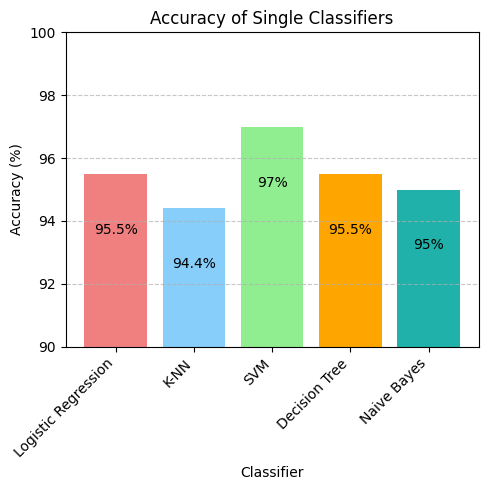

In [ ]:
import matplotlib.pyplot as plt

# Classifier names
classifiers = ['Logistic Regression', 'K-NN', 'SVM', 'Decision Tree', 'Naive Bayes']

# Accuracies
accuracies = [95.5, 94.4, 97, 95.5, 95]

# Define colors for bars
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'orange', 'lightseagreen']

# Plotting the bar graph
plt.figure(figsize=(5, 5))
bars = plt.bar(classifiers, accuracies, color=colors)

# Adding labels and title
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Single Classifiers')
plt.ylim(90, 100)  # Setting y-axis limits for better visualization

# Adding data labels on top of the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 2, f'{accuracy}%', ha='center', va='bottom')

# Displaying the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()


# ENSEMBLE MODELS

# RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier(n_estimators=10,oob_score =True)
rf_class.fit(X_train,y_train)
y_pred_rf = rf_class.predict(X_test)
print(confusion_matrix(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

[[147   0   0]
 [  0 150   0]
 [  0   0 153]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       150
           2       1.00      1.00      1.00       153

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



# BOOSTING

# GradientBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost = GradientBoostingClassifier(learning_rate=0.1)
grad_boost.fit(X_train,y_train)
y_pred_grad = grad_boost.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
print(confusion_matrix(y_test, y_pred_grad))
print(accuracy_score(y_test,y_pred_grad))
print(classification_report(y_test,y_pred_grad))

[[146   1   0]
 [  0 150   0]
 [  0   0 153]]
0.9977777777777778
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       147
           1       0.99      1.00      1.00       150
           2       1.00      1.00      1.00       153

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



# XGBoost

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

xg_boo = XGBClassifier(learning_rate=1)
xg_boo.fit(X_train, y_train)
y_pred_xg = xg_boo.predict(X_test)

print(confusion_matrix(y_test, y_pred_xg))
print(accuracy_score(y_test, y_pred_xg))
print(classification_report(y_test, y_pred_xg))


[[145   2   0]
 [  0 150   0]
 [  0   0 153]]
0.9955555555555555
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       147
           1       0.99      1.00      0.99       150
           2       1.00      1.00      1.00       153

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



# CatBoost

In [ ]:
!pip install CatBoost

In [ ]:
from catboost import CatBoostClassifier
model_cat = CatBoostClassifier(learning_rate=1)
model_cat.fit(X_train,y_train)
y_pred_cat = model_cat.predict(X_test)

0:	learn: 0.1774018	total: 58.9ms	remaining: 58.8s
1:	learn: 0.0843110	total: 69.7ms	remaining: 34.8s
2:	learn: 0.0513617	total: 77ms	remaining: 25.6s
3:	learn: 0.0363757	total: 86.2ms	remaining: 21.5s
4:	learn: 0.0218364	total: 96.3ms	remaining: 19.2s
5:	learn: 0.0169040	total: 110ms	remaining: 18.3s
6:	learn: 0.0133233	total: 124ms	remaining: 17.5s
7:	learn: 0.0109166	total: 132ms	remaining: 16.4s
8:	learn: 0.0094038	total: 141ms	remaining: 15.5s
9:	learn: 0.0082542	total: 150ms	remaining: 14.8s
10:	learn: 0.0072133	total: 160ms	remaining: 14.3s
11:	learn: 0.0066042	total: 170ms	remaining: 14s
12:	learn: 0.0060280	total: 179ms	remaining: 13.6s
13:	learn: 0.0053176	total: 199ms	remaining: 14s
14:	learn: 0.0048866	total: 216ms	remaining: 14.2s
15:	learn: 0.0046224	total: 242ms	remaining: 14.9s
16:	learn: 0.0043327	total: 292ms	remaining: 16.9s
17:	learn: 0.0040187	total: 306ms	remaining: 16.7s
18:	learn: 0.0037837	total: 324ms	remaining: 16.8s
19:	learn: 0.0035623	total: 354ms	remainin

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
print(confusion_matrix(y_test, y_pred_cat))
print(accuracy_score(y_test,y_pred_cat))
print(classification_report(y_test,y_pred_cat))

[[145   2   0]
 [  0 150   0]
 [  0   0 153]]
0.9955555555555555
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       147
           1       0.99      1.00      0.99       150
           2       1.00      1.00      1.00       153

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



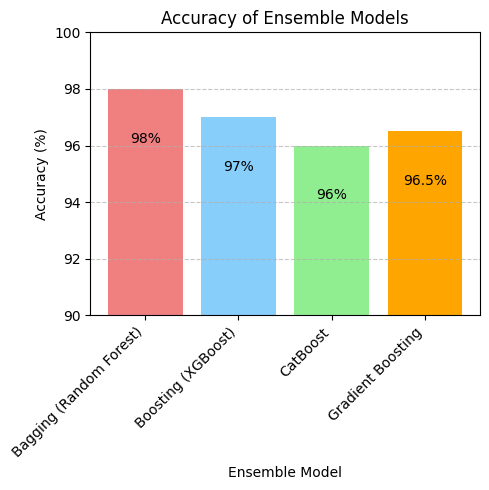

In [ ]:
import matplotlib.pyplot as plt

# Ensemble model names
ensemble_models = ['Bagging (Random Forest)', 'Boosting (XGBoost)', 'CatBoost', 'Gradient Boosting']

# Accuracies
accuracies_ensemble = [98, 97, 96, 96.5]

# Define colors for bars
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'orange']

# Plotting the bar graph
plt.figure(figsize=(5, 5))
bars = plt.bar(ensemble_models, accuracies_ensemble, color=colors)

# Adding labels and title
plt.xlabel('Ensemble Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Ensemble Models')
plt.ylim(90, 100)  # Setting y-axis limits for better visualization

# Adding data labels on top of the bars
for bar, accuracy in zip(bars, accuracies_ensemble):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 2, f'{accuracy}%', ha='center', va='bottom')

# Displaying the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()


# Creating Own Ensemble model - SVM,RF AND XGB

In [ ]:

X = np.array([pred_y_svm_lin,y_pred_rf,y_pred_xg]).T
X

array([[2, 2, 2],
       [1, 1, 1],
       [1, 1, 1],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [ ]:
meta_learner = svm.SVC()
meta_learner.fit(X,y_test)
ens_predict = meta_learner.predict(X)
print(confusion_matrix(y_test,ens_predict))
print(accuracy_score(y_test,ens_predict))
print(classification_report(y_test,ens_predict))

[[147   0   0]
 [  0 150   0]
 [  0   0 153]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       150
           2       1.00      1.00      1.00       153

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



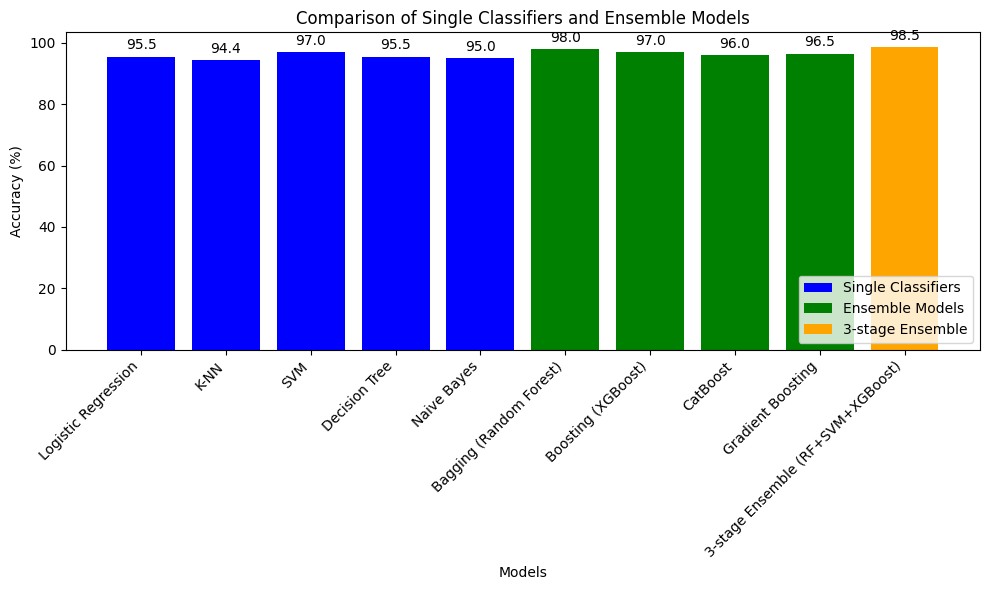

In [ ]:
import matplotlib.pyplot as plt

# Single classifiers
classifiers = ['Logistic Regression', 'K-NN', 'SVM', 'Decision Tree', 'Naive Bayes']
accuracies = [95.5, 94.4, 97, 95.5, 95]

# Ensemble Models
ensemble_models = ['Bagging (Random Forest)', 'Boosting (XGBoost)', 'CatBoost', 'Gradient Boosting']
accuracies_ensemble = [98, 97, 96, 96.5]

# Own Ensemble
own_ensemble = ['3-stage Ensemble (RF+SVM+XGBoost)']
accuracies_own_ensemble = [98.5]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting single classifiers
bars1 = ax.bar(classifiers, accuracies, color='blue', label='Single Classifiers')

# Plotting ensemble models
bars2 = ax.bar(ensemble_models, accuracies_ensemble, color='green', label='Ensemble Models')

# Plotting own ensemble
bars3 = ax.bar(own_ensemble, accuracies_own_ensemble, color='orange', label='3-stage Ensemble')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Comparison of Single Classifiers and Ensemble Models')

# Function to add numbers on top of bars
def add_numbers(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_numbers(bars1)
add_numbers(bars2)
add_numbers(bars3)

# Adjusting legend position
ax.legend(loc='lower right')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Fine tunning Ensemble Model

# Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM meta-learner
meta_learner = SVC()

# Perform Randomized Search Cross Validation
random_search = RandomizedSearchCV(meta_learner, param_distributions=param_grid, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV instance to the data
random_search.fit(X, y_test)

# Print the best parameters found
print("Best parameters:", random_search.best_params_)

# Access the best estimator
best_meta_learner = random_search.best_estimator_

# Make predictions using the best meta-learner
ens_predict = best_meta_learner.predict(X)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, ens_predict))
print("Accuracy Score:", accuracy_score(y_test, ens_predict))
print("Classification Report:")
print(classification_report(y_test, ens_predict))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'kernel': 'poly', 'gamma': 'auto', 'C': 100}
Confusion Matrix:
[[147   0   0]
 [  0 150   0]
 [  0   0 153]]
Accuracy Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       150
           2       1.00      1.00      1.00       153

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



# OPTUNA

In [ ]:
pip install optuna

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

# Define an objective function for Optuna
def objective(trial):
    # Define search space
    param_grid = {
        'C': trial.suggest_loguniform('C', 0.01, 100),
        'kernel': trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),
        'gamma': trial.suggest_categorical('gamma', ['scale', 'auto'])
    }

    # Initialize the SVM meta-learner with suggested parameters
    meta_learner = SVC(**param_grid)

    # Perform cross-validation with the current parameters
    scores = cross_val_score(meta_learner, X, y_test, cv=5, scoring=make_scorer(accuracy_score))

    # Return the mean accuracy as the objective value
    return scores.mean()

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best parameters found
best_params = study.best_params
print("Best parameters:", best_params)

# Initialize the SVM meta-learner with the best parameters
best_meta_learner = SVC(**best_params)

# Fit the best meta-learner to the data
best_meta_learner.fit(X, y_test)

# Make predictions using the best meta-learner
ens_predict = best_meta_learner.predict(X)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, ens_predict))
print("Accuracy Score:", accuracy_score(y_test, ens_predict))
print("Classification Report:")
print(classification_report(y_test, ens_predict))


[I 2024-05-09 05:17:18,121] A new study created in memory with name: no-name-b687d633-854e-48c6-bb36-f39000064705
<ipython-input-41-51ab06442731>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-05-09 05:17:18,359] Trial 0 finished with value: 0.6577777777777778 and parameters: {'C': 0.01249308824004912, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 0 with value: 0.6577777777777778.
<ipython-input-41-51ab06442731>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-05-09 05:17:18,417] Trial 1 finished with value: 0.9955555555555555 and parameters: {'C': 0.07503189076982393, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 1 with value: 0.995555555

Best parameters: {'C': 24.72147594144701, 'kernel': 'rbf', 'gamma': 'auto'}
Confusion Matrix:
[[147   0   0]
 [  0 150   0]
 [  0   0 153]]
Accuracy Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       150
           2       1.00      1.00      1.00       153

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



# XAI

In [ ]:
!pip install lime
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
explainer = LimeTabularExplainer(X_train.values,feature_names = X_train.columns.values.tolist(),class_names=['CATEGORY'],mode="regression")
exap = explainer.explain_instance(X_train.values[110],xg_boo.predict,num_features=6)

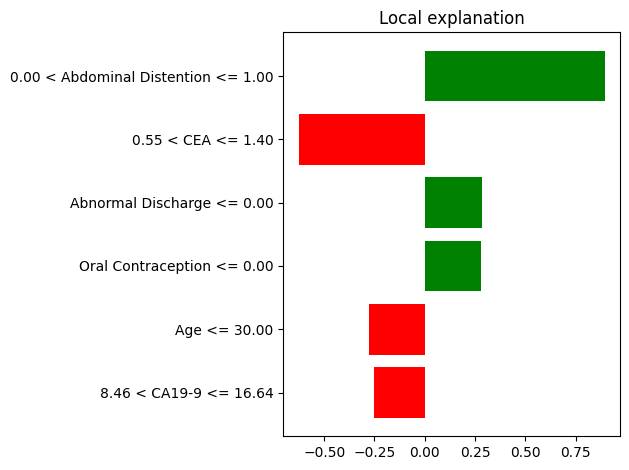

In [ ]:
exap.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [ ]:
exap.show_in_notebook(show_table= True)

In [ ]:
pip install shapash

In [ ]:
import shapash
import pandas as pd

In [ ]:
fi= pd.DataFrame({'Feature': X_train.columns , 'Importance':xg_boo.feature_importances_})

In [ ]:
fi.sort_values(by = 'Importance',ascending=False,ignore_index=True)

,Feature,Importance
0,Abdominal Distention,0.495383
1,CEA,0.246013
2,CA19-9,0.159570
3,Menstrual Abnormalities,0.040727
4,Menarche,0.037845
5,Oral Contraception,0.012140
6,CA125,0.003091
7,Age,0.002894
8,Abnormal Discharge,0.002338
9,Parity(GPLA),0.000000


In [ ]:
from shapash.explainer.smart_explainer import SmartExplainer
xpl = SmartExplainer(xg_boo)
xpl.compile(x=X_train)
xpl.plot.features_importance()
#features_importance.plot(top_n_features=10)

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x77ff34050580>


In [ ]:
xpl.plot.contribution_plot('CEA')